In [1]:
import pandas as pd
import json
import numpy as np
import torch

In [2]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [3]:
from numpy import dot
from numpy.linalg import norm

In [4]:
from transformers import AutoTokenizer, AutoModel
from sklearn.feature_extraction import DictVectorizer

## ARXIV Category analysis

In [4]:
df =pd.read_csv('article_category.csv')

In [98]:
df = df.drop('Unnamed: 0', axis=1)

In [99]:
df.head()

,id,category
0,1405.3379,stat.ML
1,0901.1147,hep-ex
2,nlin/0608019,nlin.CD
3,0903.5449,physics.optics
4,hep-ph/0605279,hep-ph


In [103]:
df = pd.concat([df,pd.DataFrame({'id' : id_gotten, 'category': primary_cat})]) 

In [105]:
#df.to_csv('article_category_1.csv',index=False)

In [104]:
len(set(df.category))

165

There are 165 unique categories

In [4]:
cats = ['cs', 'math', 'ph', 'q-bio', 'q-fin', 'stat']

In [5]:
DS_categogy = ['stat.ML', 'cs.AI', 'cs.CL', 'cs.CV', 'cs.LG', 'cs.NE', 'adap-org','bayes-an', 'cmp-lg']

In [6]:
CS_category = ['cs.AI', 'cs.AR','cs.CC','cs.CE','cs.CG','cs.CL','cs.CR','cs.CV','cs.CY','cs.DB','cs.DC',
               'cs.DL','cs.DM','cs.DS','cs.ET','cs.FL','cs.GL','cs.GR','cs.GT','cs.HC','cs.IR','cs.IT',
               'cs.LG','cs.LO','cs.MA','cs.MM','cs.MS','cs.NA','cs.NE','cs.NI','cs.OH','cs.OS','cs.PF',
               'cs.PL','cs.RO','cs.SC','cs.SD','cs.SE','cs.SI','cs.SY']

In [7]:
cats_dict = {
    'cs':['cs.AI','cs.AR','cs.CC','cs.CE','cs.CG','cs.CL','cs.CR','cs.CV','cs.CY','cs.DB','cs.DC','cs.DL','cs.DM','cs.DS','cs.ET','cs.FL','cs.GL','cs.GR','cs.GT','cs.HC','cs.IR',
          'cs.IT','cs.LG','cs.LO','cs.MA','cs.MM','cs.MS','cs.NA','cs.NE','cs.NI','cs.OH','cs.OS','cs.PF','cs.PL','cs.RO','cs.SC','cs.SD','cs.SE','cs.SI','cs.SY','adap-org','bayes-an',
          'cmp-lg', 'comp-gas'
         ], 
    'math':['math-ph','math.AC','math.AG','math.AP','math.AT','math.CA','math.CO','math.CT','math.CV','math.DG','math.DS','math.FA','math.GM','math.GN','math.GR','math.GT',
            'math.HO','math.KT','math.LO','math.MG','math.NA','math.NT','math.OA','math.OC','math.PR','math.QA','math.RA','math.RT','math.SG','math.SP','math.ST','alg-geom',
            'dg-ga', 'funct-an', 'patt-sol', 'q-alg','solv-int'
           ], 
    'ph':['physics.acc-ph','physics.ao-ph','physics.atm-clus','physics.atom-ph','physics.bio-ph','physics.chem-ph','physics.class-ph','physics.comp-ph','physics.data-an',
          'physics.ed-ph','physics.flu-dyn','physics.gen-ph','physics.geo-ph','physics.hist-ph','physics.ins-det','physics.med-ph','physics.optics','physics.plasm-ph',
          'physics.pop-ph','physics.soc-ph','physics.space-ph','acc-phys', 'ao-sci', 'atom-ph','chao-dyn','chem-ph',
          'eess.SY','hep-ex', 'hep-lat','hep-ph','hep-th', 'mtrl-th', 'nucl-ex','nucl-th','plasm-ph', 'quant-ph', 'supr-con'
         ], 
    'q-bio':['q-bio.BM','q-bio.CB','q-bio.GN','q-bio.MN','q-bio.NC','q-bio.OT','q-bio.PE','q-bio.QM','q-bio.SC','q-bio.TO'
            ], 
    'q-fin':['q-fin.CP','q-fin.EC','q-fin.GN','q-fin.MF','q-fin.PM','q-fin.PR','q-fin.RM','q-fin.ST','q-fin.TR'
            ], 
    'stat':['stat.AP','stat.CO','stat.ME','stat.ML','stat.OT'
           ],
    'astro':['astro-ph','astro-ph.CO','astro-ph.EP','astro-ph.GA','astro-ph.HE','astro-ph.IM','astro-ph.SR', 'gr-qc'],
    'cond-mat':['cond-mat','cond-mat.dis-nn','cond-mat.mes-hall','cond-mat.mtrl-sci','cond-mat.other','cond-mat.quant-gas','cond-mat.soft','cond-mat.stat-mech',
                'cond-mat.str-el','cond-mat.supr-con'],
    'nlin':['nlin.AO','nlin.CD','nlin.CG','nlin.PS','nlin.SI']
}

In [6]:
inv_cats_dict = {}
for k, vs in cats_dict.items():
    for v in vs:
        inv_cats_dict[v] = k

In [84]:
text_train = []
with open('D:/SciPaper/arxiv-dataset/train.txt') as f:
    for line in f:
        text_train.append(line.strip())

In [74]:
%%time
article_lenght = []
article_id = []
abstract_lenght = []

for each in text_train:
    paper = json.loads(each)
    abstract_lenght.append(len(str(paper['abstract_text']).split(' ')))
    article_lenght.append(len(str(paper['article_text']).split(' ')))
    article_id.append(paper['article_id'])

Wall time: 2min 50s


In [81]:
lenght_df = pd.DataFrame({'id':new_article_id,'article_lenght':article_lenght,'abstract_lenght':abstract_lenght})

In [141]:
df1 = df.merge(lenght_df, left_on='id', right_on='id')

In [142]:
general_category = []
for cat in df1.category:
    if cat in DS_categogy:
        general_category.append('DS')
    else:
        general_category.append(inv_cats_dict[cat])

In [143]:
df1['general_category'] = general_category

In [144]:
df1.to_csv('article_analysis.csv',index=False)

In [8]:
#df1 =pd.read_csv('article_analysis.csv')

In [162]:
df1

,id,category,article_lenght,abstract_lenght,general_category
0,1405.3379,stat.ML,4535,158,DS
1,0901.1147,hep-ex,3362,66,ph
2,nlin/0608019,nlin.CD,5404,278,nlin
3,0903.5449,physics.optics,3754,89,ph
4,hep-ph/0605279,hep-ph,9485,159,ph
...,...,...,...,...,...
203032,quant-ph/0402038,quant-ph,169,3708,ph
203033,0907.3736,cond-mat.str-el,6209,149,cond-mat
203034,1506.04688,math.CO,4280,157,math
203035,cond-mat/0304118,cond-mat.mes-hall,403,5282,cond-mat


In [148]:
df1.groupby('general_category').agg({'category':'count','article_lenght':'mean', 'abstract_lenght':'mean'}).round(1)

,category,article_lenght,abstract_lenght
general_category,,,
DS,2077,5900.5,225.1
astro,64242,6497.8,257.3
cond-mat,38913,5813.1,454.2
cs,7393,7122.4,222.9
math,22299,8122.7,177.5
nlin,2619,5958.2,315.0
ph,61823,5373.9,326.6
q-bio,1842,6748.0,411.7
q-fin,707,6744.9,227.7


In [173]:
df1.describe()

,article_lenght,abstract_lenght
count,203037.000000,203037.000000
mean,6218.015283,307.794550
std,4845.316773,660.871314
min,1.000000,1.000000
25%,3262.000000,125.000000
50%,5061.000000,179.000000
75%,7895.000000,258.000000
max,299324.000000,29126.000000


there are only about 5% of articles are related to CS and only 1% related to DS

## ARXIV Embeddings

In [6]:
from sentence_transformers import SentenceTransformer
import torch

In [108]:
tokenizer = AutoTokenizer.from_pretrained("allenai/scibert_scivocab_uncased")
model = AutoModel.from_pretrained("allenai/scibert_scivocab_uncased")

Some weights of the model checkpoint at allenai/scibert_scivocab_uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [23]:
def cos_sim(a,b):
    return dot(a, b)/(norm(a)*norm(b))

In [ ]:
# Put the model on GPU if available
if torch.cuda.is_available():
    device = torch.device("cuda")
    model.to(device)
else:
    device = torch.device("cpu")

# Define a function to get the SciBERT embeddings for a given text
def get_embeddings(text):
    # Tokenize the text
    input_ids = torch.tensor([tokenizer.encode(text, padding=True, truncation=True, max_length = 512)])
    # Put the input on GPU if available
    if torch.cuda.is_available():
        input_ids = input_ids.to(device)
    # Get the embeddings
    with torch.no_grad():
        last_hidden_states = model(input_ids)[0]
    embeddings = torch.mean(last_hidden_states, dim=1).squeeze()
    torch.cuda.empty_cache()
    return embeddings.cpu().numpy()

In [85]:
%%time
abstracts = []

for paper in text_train:
    abstracts.append(str(json.loads(paper)['abstract_text']).replace('</S>','').replace('<S>','').replace("', '", '').replace("[' ",'').replace(" ']",'').replace(' . ','.'))

Wall time: 1min 40s


In [86]:
text_train=None

In [31]:
%%time
embeddings = []
for abstract in abstracts:
    embeddings.append(get_embeddings(abstract))

Wall time: 1h 1min 40s


In [25]:
norm_embeddings = []
for emb in embeddings:
    norm_embeddings.append(emb/norm(emb))

In [ ]:
np.save('D:/SciPaper/arxiv-dataset/abstract_embeddings.npy', np.array(embeddings))

In [31]:
DS_embeddings = embeddings[df1.loc[df1.general_category=="DS"].index]

### test and val

In [8]:
test_abstract = []
with open('D:/SciPaper/arxiv-dataset/test_abstract.txt') as f:
    for line in f:
        test_abstract.append(line.strip())

In [10]:
val_abstract = []
with open('D:/SciPaper/arxiv-dataset/val_abstract.txt') as f:
    for line in f:
        val_abstract.append(line.strip())

In [13]:
test_embeddings = model.encode(test_abstract, batch_size=128, show_progress_bar=True)

In [15]:
val_embeddings = model.encode(val_abstract, batch_size=128, show_progress_bar=True)

In [17]:
np.save('D:/SciPaper/arxiv-dataset/test_abstract_embeddings.npy', np.array(test_embeddings))
np.save('D:/SciPaper/arxiv-dataset/val_abstract_embeddings.npy', np.array(val_embeddings))

## ARXIV Clusterization

In [12]:
k = []
inertia = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(norm_embeddings)
    k.append(i)
    inertia.append(kmeans.inertia_)

(24000.0, 35000.0)

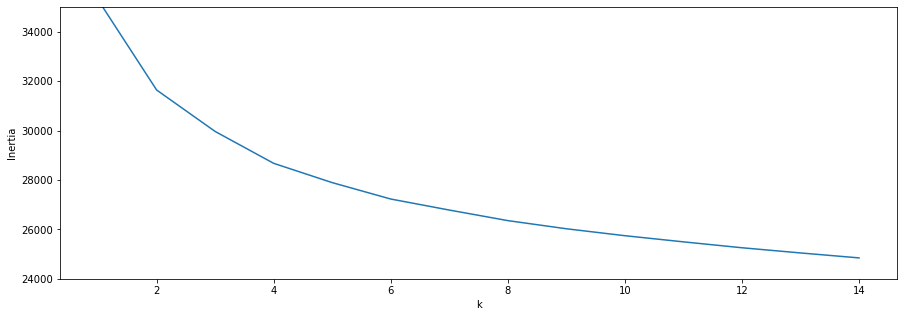

In [21]:
plt.figure(figsize=(15, 5))
plt.plot(k, inertia)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.ylim(24000,35000)

In [22]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(norm_embeddings)

In [23]:
kmeans.labels_

array([3, 2, 3, ..., 5, 4, 1])

In [24]:
df1['cluster'] = kmeans.labels_

In [25]:
df1.groupby('cluster').agg({'category':'count','article_lenght':'mean', 'abstract_lenght':'mean'}).round(1)

,id,category,article_lenght,abstract_lenght,general_category,cluster
0,1405.3379,stat.ML,4535,158,DS,3
1,0901.1147,hep-ex,3362,66,ph,2
2,nlin/0608019,nlin.CD,5404,278,nlin,3
3,0903.5449,physics.optics,3754,89,ph,1
4,hep-ph/0605279,hep-ph,9485,159,ph,2
...,...,...,...,...,...,...
203032,quant-ph/0402038,quant-ph,169,3708,ph,3
203033,0907.3736,cond-mat.str-el,6209,149,cond-mat,1
203034,1506.04688,math.CO,4280,157,math,5
203035,cond-mat/0304118,cond-mat.mes-hall,403,5282,cond-mat,4


In [39]:
grouped = df1.groupby(['cluster', 'general_category']).size().reset_index(name='count')

# Calculate the total count for each cluster
total_counts = grouped.groupby('cluster')['count'].sum().reset_index(name='total_count')
total_general_category = grouped.groupby('general_category')['count'].sum().reset_index(name='total_general_category')

# Merge the total counts back into the grouped DataFrame
grouped = pd.merge(grouped, total_counts, on='cluster')
grouped = pd.merge(grouped, total_general_category, on='general_category')

# Calculate the percentage for each row
grouped['percentage_of_cluster'] = round(grouped['count'] / grouped['total_count'] * 100,1)
grouped['percentage_of_category'] = round(grouped['count'] / grouped['total_general_category'] * 100,1)

In [40]:
grouped = grouped.drop(['total_count', 'total_general_category'], axis=1)

In [49]:
grouped_arxiv = grouped.sort_values('cluster')

In [51]:
grouped_arxiv.groupby('cluster').agg({'count':'sum'})

,count
cluster,
0,48501
1,53578
2,28062
3,30280
4,24092
5,18524


In [53]:
grouped_arxiv

,cluster,general_category,count,percentage_of_cluster,percentage_of_category
0,0,astro,48261,99.5,75.1
12,0,ph,238,0.5,0.4
6,0,nlin,2,0.0,0.1
27,1,cs,16,0.0,0.2
18,1,DS,5,0.0,0.2
32,1,math,1274,2.4,5.7
13,1,ph,17826,33.3,28.8
22,1,cond-mat,27269,50.9,70.1
41,1,q-fin,8,0.0,1.1
37,1,q-bio,139,0.3,7.5


### dimensionality reduction and visualization

In [84]:
pca_2D = PCA(n_components=2)
pca_2D.fit(norm_embeddings)

PCA(n_components=2)

In [85]:
embeddings_pca_2 = pca_2D.transform(norm_embeddings)

In [86]:
psa2_df = pd.DataFrame(embeddings_pca_2, columns=['PC1', 'PC2'])

In [90]:
psa2_df['cluster'] = df1['cluster']
psa2_df['general_category'] = df1['general_category']

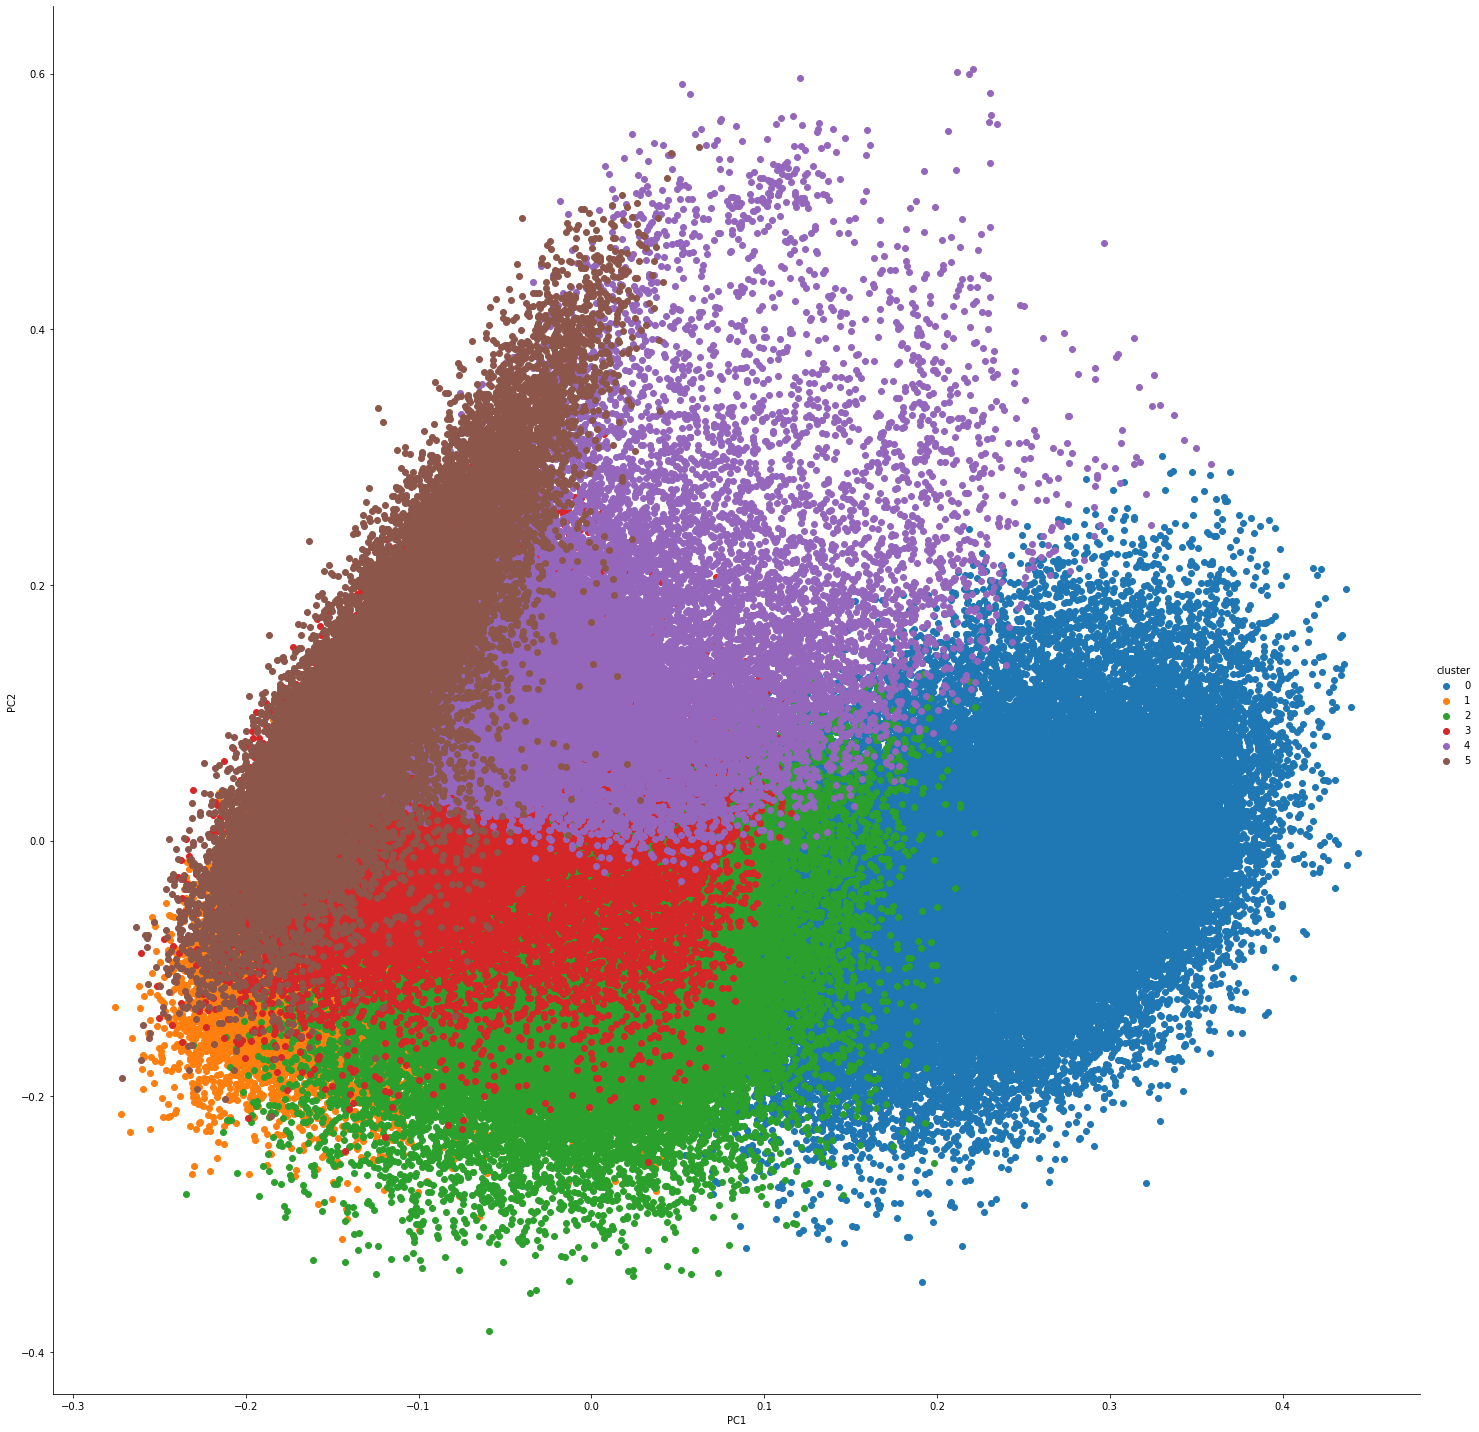

In [93]:
sns.FacetGrid(psa2_df, hue='cluster',height=20).map(plt.scatter, 'PC1', 'PC2').add_legend()
plt.show()

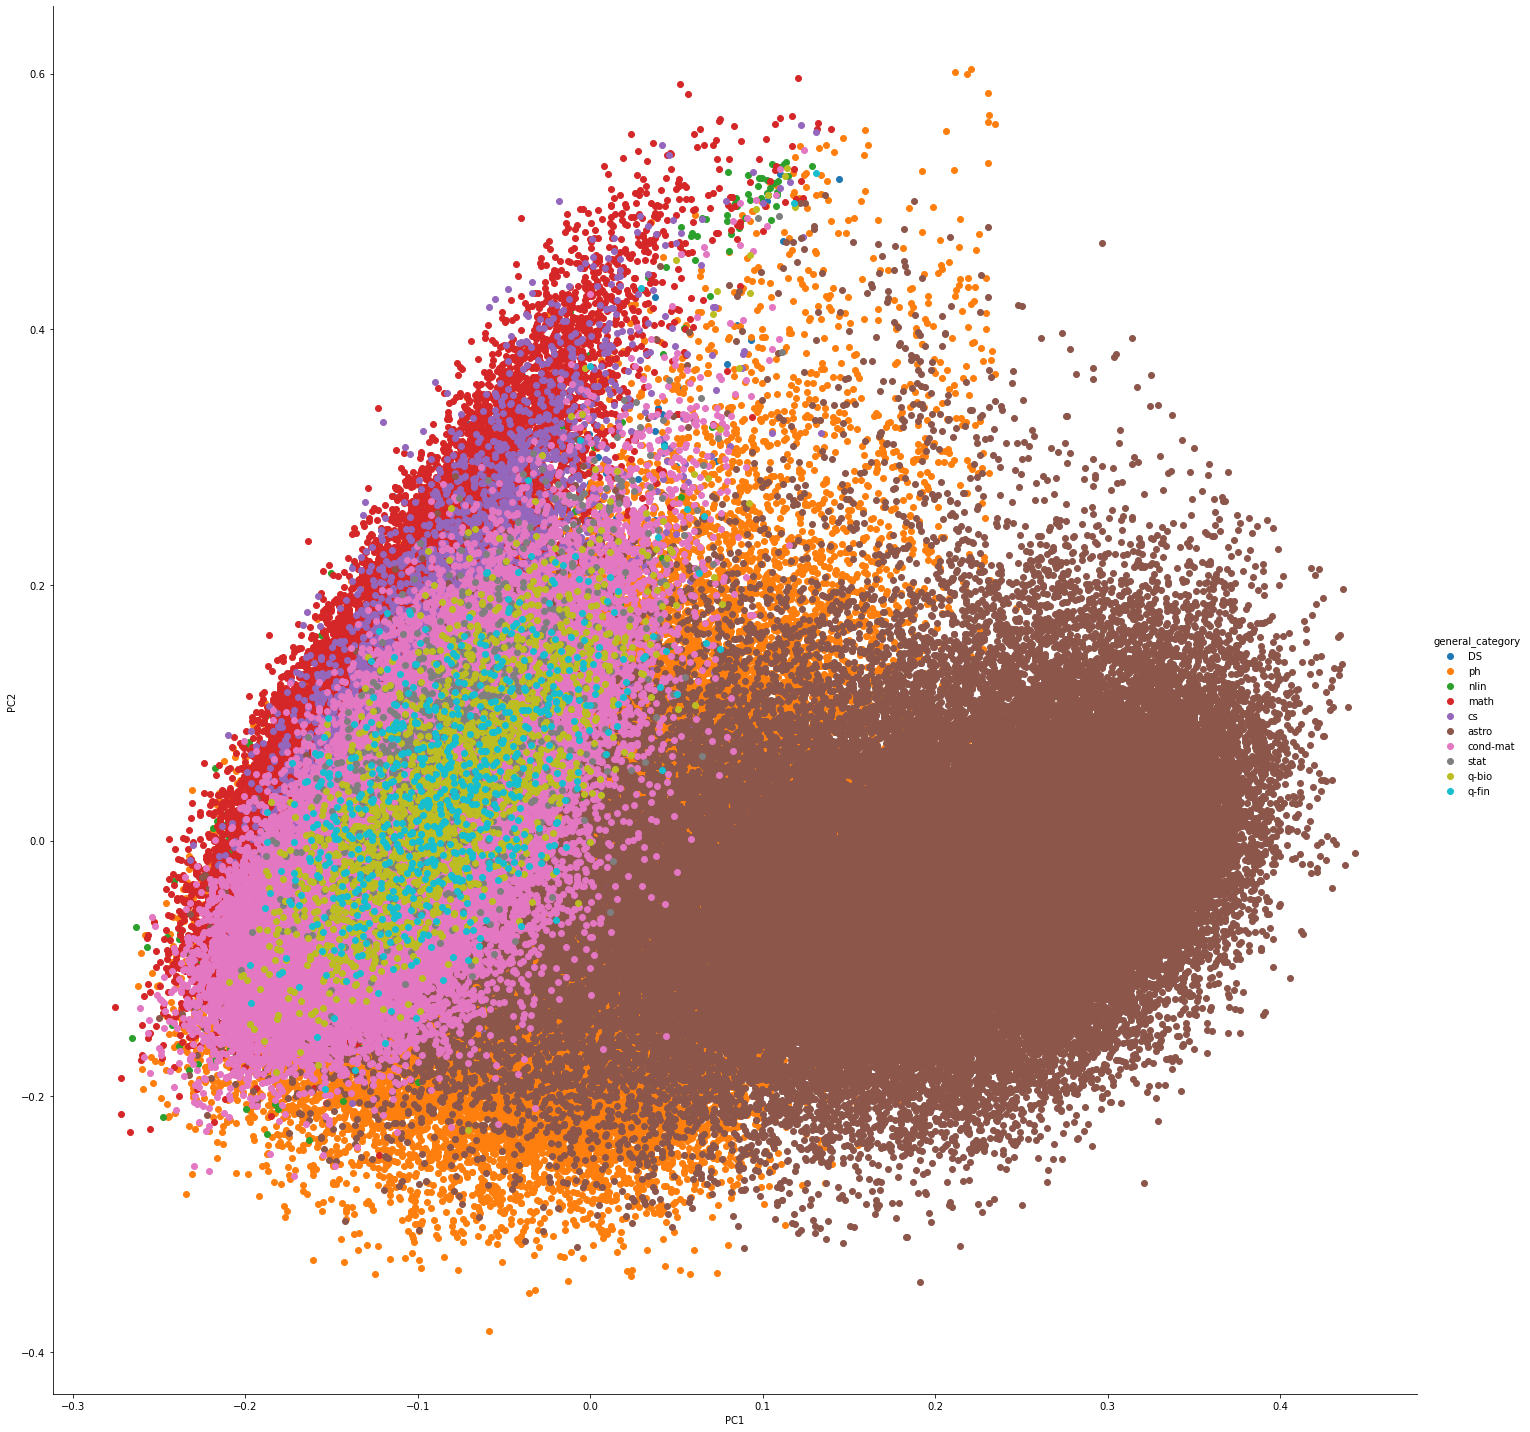

In [92]:
sns.FacetGrid(psa2_df, hue='general_category',height=20).map(plt.scatter, 'PC1', 'PC2').add_legend()
plt.show()

## ARXIV Centroids by clusters calculation

In [55]:
df1.head()

,id,category,article_lenght,abstract_lenght,general_category,cluster
0,1405.3379,stat.ML,4535,158,DS,3
1,0901.1147,hep-ex,3362,66,ph,2
2,nlin/0608019,nlin.CD,5404,278,nlin,3
3,0903.5449,physics.optics,3754,89,ph,1
4,hep-ph/0605279,hep-ph,9485,159,ph,2


In [58]:
ds_indexs = df1.loc[df1['general_category']=='DS'].index

In [72]:
embeds = np.array(norm_embeddings)[ds_indexs]
emb = np.mean(embeds,axis = 0)
ds_centroid = np.array(emb/norm(emb))

In [66]:
clusters_centroids = []
for i in range(6):
    indexes = df1.loc[df1['cluster']==i].index
    embeds = np.array(norm_embeddings)[indexes]
    emb = np.mean(embeds,axis = 0)
    clusters_centroids.append(emb/norm(emb))

In [70]:
clusters_centroids = np.array(clusters_centroids)

In [71]:
clusters_centroids.shape

(6, 768)

In [75]:
for i in range(6):
    print(f'cluster # {i} cosine similarity with DS Cluster: {cos_sim(ds_centroid, clusters_centroids[i])}')

cluster # 0 cosine similarity with DS Cluster: 0.9131274223327637
cluster # 1 cosine similarity with DS Cluster: 0.9480980634689331
cluster # 2 cosine similarity with DS Cluster: 0.9194319844245911
cluster # 3 cosine similarity with DS Cluster: 0.9894165396690369
cluster # 4 cosine similarity with DS Cluster: 0.9349737167358398
cluster # 5 cosine similarity with DS Cluster: 0.9443922638893127


In [123]:
np.save('D:/SciPaper/arxiv-dataset/abstract_norm_embeddings.npy', np.array(norm_embeddings))

In [125]:
np.save('D:/SciPaper/arxiv-dataset/abstract_clusters_centroids.npy', np.array(clusters_centroids))

In [126]:
np.save('D:/SciPaper/arxiv-dataset/ds_centroid.npy', np.array(ds_centroid))

In [127]:
df1.to_csv('article_analysis.csv',index=False)

In [128]:
grouped_arxiv.to_csv('grouped_arxiv.csv',index=False)

### clusterization of test and val

In [20]:
%who

AutoModel	 AutoTokenizer	 DictVectorizer	 KMeans	 PCA	 SentenceTransformer	 TSNE	 clusters_centroids	 dot	 
ds_centroid	 f	 json	 line	 model	 norm	 np	 pd	 plt	 
sns	 test_abstract	 test_embeddings	 torch	 val_abstract	 val_embeddings	 


In [21]:
clusters_centroids.shape

(6, 768)

In [24]:
def test_val_clusterization(emb):
    cos_sim_arr=[]
    for cluster in clusters_centroids:
        cos_sim_arr.append(cos_sim(cluster,emb))
    return np.argmax(cos_sim_arr)

In [29]:
test_clusters = []
for test in test_embeddings:
    test_clusters.append(test_val_clusterization(test))

In [30]:
val_clusters = []
for val in val_embeddings:
    val_clusters.append(test_val_clusterization(val))

In [33]:
with open('test_clusters.txt', 'w') as f:
    for item in test_clusters:
        f.write(f'{item}\n')

In [34]:
with open('val_clusters.txt', 'w') as f:
    for item in val_clusters:
        f.write(f'{item}\n')

## ARXIV Centroids by category calculation

In [251]:
df1.head()

,id,category,article_lenght,abstract_lenght,general_category,cluster
0,1405.3379,stat.ML,4535,158,DS,3
1,0901.1147,hep-ex,3362,66,ph,2
2,nlin/0608019,nlin.CD,5404,278,nlin,3
3,0903.5449,physics.optics,3754,89,ph,1
4,hep-ph/0605279,hep-ph,9485,159,ph,2


In [255]:
category_list = df1.category.unique()

In [257]:
category_centroids = []
for cat in category_list:
    
    indexes = df1.loc[df1['category']==cat].index
    embeds = np.array(norm_embeddings)[indexes]
    emb = np.mean(embeds,axis = 0)
    category_centroids.append(emb/norm(emb))

In [259]:
category_centroids = np.array(category_centroids)

In [260]:
category_centroids.shape

(165, 768)

In [262]:
cos_sim_list=[]
for i in range(165):
    cos_sim_list.append(cos_sim(ds_centroid, category_centroids[i]))

In [270]:
pd.DataFrame({'category':category_list, 'cos_similarity':cos_sim_list}).sort_values('cos_similarity',ascending = False).head(25)

,category,cos_similarity
92,cs.LG,0.997143
0,stat.ML,0.994977
7,cs.CV,0.994699
58,cs.AI,0.992352
100,cs.NE,0.991601
139,cs.IR,0.990366
70,cs.CL,0.989458
89,cs.OH,0.988150
22,stat.AP,0.987578
108,cs.DB,0.987087


## Vacabulary analysis

In [79]:
from transformers import AutoTokenizer
import torch

In [93]:
from collections import Counter
from wordcloud import WordCloud

In [108]:
import nltk
from nltk.corpus import stopwords

In [161]:
import re

In [100]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bakhi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

### Cluster vocabulary Analysis

In [80]:
# Load the SciBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained('allenai/scibert_scivocab_uncased')

In [231]:
%%time
clusters_words = []

for i in range(6):
    cluster_words={}
    indexes = df1.loc[df1['cluster']==i].index
    cluster_abstracts = [abstracts[i] for i in indexes]
    cluster_abstracts = cluster_abstracts
    
    for abstr in cluster_abstracts:
        words = tokenizer.tokenize(abstr, add_special_tokens=False)
        words = dict(Counter(words))
        
        result_dict = {}
        for key, value in cluster_words.items():
            result_dict[key] = value

        # Iterate over the keys in dict2 and add the values
        for key, value in words.items():
            if key in result_dict:
                result_dict[key] += value
            else:
                result_dict[key] = value

        cluster_words = result_dict
    clusters_words.append(cluster_words)

Wall time: 10min 30s


In [234]:
stop_words = set(stopwords.words('english'))

In [324]:
for x in ['xm','@', ',', '.', 0,1,2,3,4,5,6,7,8,9,')','(','*','[',']','_','/','+','xc','-','{','}','fig','\\',':',';','"','!','0','1','2','3','4','5','6','7','8','9','=','two',"'",'model']:
    stop_words.add(x)

In [325]:
%%time
clear_clusters_words = []
for i in range(6):
    clear_cluster_words={}
    for key, value in clusters_words[i].items():
        if key not in stop_words:
            if not re.match(r'^#', key):
                clear_cluster_words[key] = value
    clear_clusters_words.append(clear_cluster_words)

Wall time: 130 ms


In [326]:
with open('clusters_words.json', 'w') as f:
    json.dump(clear_clusters_words, f)

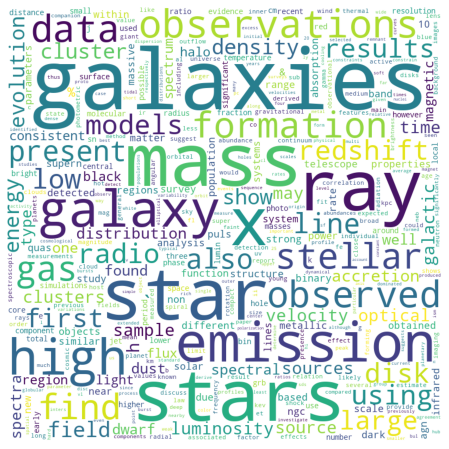

In [327]:
wordcloud = WordCloud(width=800, height=800,max_words=400, background_color='white').generate_from_frequencies(clear_clusters_words[0])
# Display the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

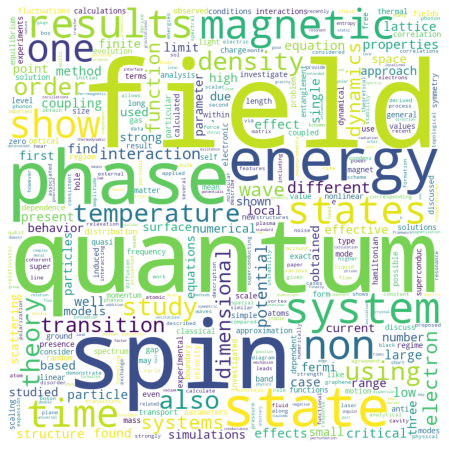

In [328]:
wordcloud = WordCloud(width=800, height=800,max_words=400, background_color='white').generate_from_frequencies(clear_clusters_words[1])
# Display the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

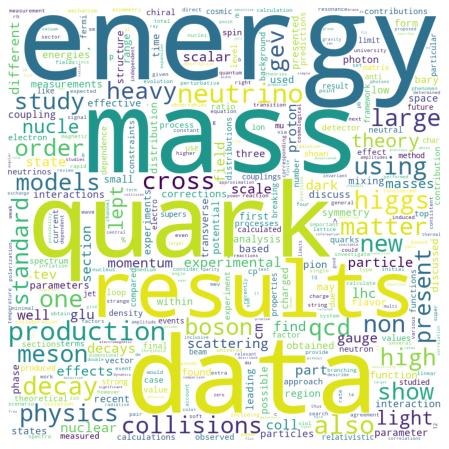

In [329]:
wordcloud = WordCloud(width=800, height=800,max_words=400, background_color='white').generate_from_frequencies(clear_clusters_words[2])
# Display the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

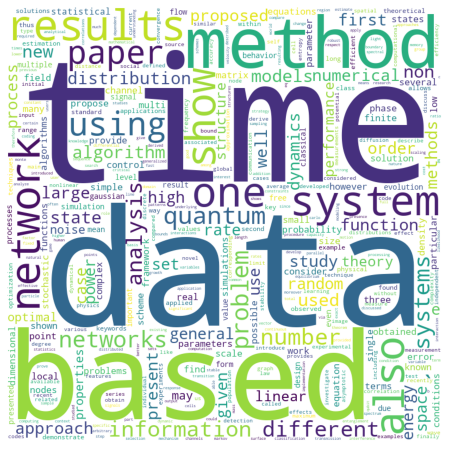

In [330]:
wordcloud = WordCloud(width=800, height=800,max_words=400, background_color='white').generate_from_frequencies(clear_clusters_words[3])
# Display the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

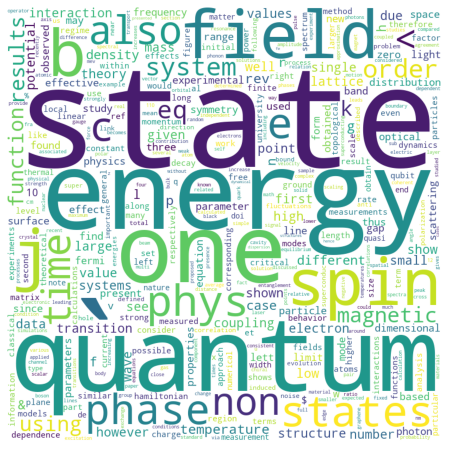

In [331]:
wordcloud = WordCloud(width=800, height=800,max_words=400, background_color='white').generate_from_frequencies(clear_clusters_words[4])
# Display the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

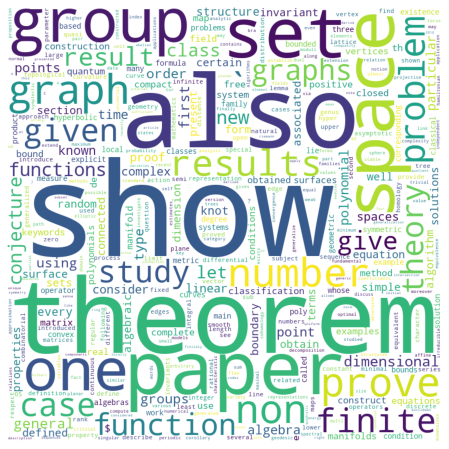

In [332]:
wordcloud = WordCloud(width=800, height=800, max_words=400, background_color='white',relative_scaling =1).generate_from_frequencies(clear_clusters_words[5])
# Display the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Data Preparation

In [10]:
test_clusters = []
with open('test_clusters.txt') as f:
    for line in f:
        test_clusters.append(int(line.strip()))

In [12]:
len(test_clusters)

6440

In [13]:
val_clusters = []
with open('val_clusters.txt') as f:
    for line in f:
        val_clusters.append(int(line.strip()))

In [14]:
len(val_clusters)

6436

### train

In [337]:
with open("D:/SciPaper/arxiv-dataset/train_abstract.txt", "w") as file:
    for string in abstracts:
        file.write(string + "\n")

In [5]:
text_train = []
with open('D:/SciPaper/arxiv-dataset/train.txt') as f:
    for line in f:
        text_train.append(line.strip())

In [13]:
%%time
train_article = []
train_abstract = []

for each in text_train:
    paper = json.loads(each)
    art = ''
    for sentence in paper['article_text']:
        art+=sentence
    abst = ''
    for sentence in paper['abstract_text']:
        abst+=sentence

    train_abstract.append(abst.replace('<S>','').replace('</S>',''))
    train_article.append(art)

Wall time: 3min 10s


In [16]:
with open("D:/SciPaper/arxiv-dataset/train_abstract.txt", "w") as file:
    for string in train_abstract:
        file.write(string + "\n")

In [17]:
with open("D:/SciPaper/arxiv-dataset/train_article.txt", "w") as file:
    for string in train_article:
        file.write(string + "\n")

In [18]:
text_train=None

### test

In [3]:
import json

In [15]:
text_test = []
with open('D:/SciPaper/arxiv-dataset/test.txt') as f:
    for line in f:
        text_test.append(line.strip())

In [16]:
%%time
test_article = []
test_abstract = []

for each in text_test:
    paper = json.loads(each)
    art = ''
    for sentence in paper['article_text']:
        art+=sentence
    abst = ''
    for sentence in paper['abstract_text']:
        abst+=sentence

    test_abstract.append(abst.replace('<S>','').replace('</S>',''))
    test_article.append(art)

Wall time: 1.42 s


In [7]:
with open("D:/SciPaper/arxiv-dataset/test_abstract.txt", "w") as file:
    for string in test_abstract:
        file.write(string + "\n")

In [8]:
with open("D:/SciPaper/arxiv-dataset/test_article.txt", "w") as file:
    for string in test_article:
        file.write(string + "\n")

### val

In [17]:
text_val = []
with open('D:/SciPaper/arxiv-dataset/val.txt') as f:
    for line in f:
        text_val.append(line.strip())

In [18]:
%%time
val_article = []
val_abstract = []

for each in text_val:
    paper = json.loads(each)
    art = ''
    for sentence in paper['article_text']:
        art+=sentence
    abst = ''
    for sentence in paper['abstract_text']:
        abst+=sentence

    val_abstract.append(abst.replace('<S>','').replace('</S>',''))
    val_article.append(art)

Wall time: 1.42 s


In [11]:
with open("D:/SciPaper/arxiv-dataset/val_abstract.txt", "w") as file:
    for string in val_abstract:
        file.write(string + "\n")

In [12]:
with open("D:/SciPaper/arxiv-dataset/val_article.txt", "w") as file:
    for string in val_article:
        file.write(string + "\n")

# SAVE DS DATASET

In [36]:
df = pd.read_csv('article_analysis.csv')

In [41]:
train_ds_index = df.loc[df.cluster==3].index

In [43]:
len(train_ds_index)/len(df)

0.1491353792658481

In [44]:
len(train_ds_index)

30280

In [54]:
ds_train_abstract = []
ds_train_article = []

for i in train_ds_index:
    ds_train_abstract.append(train_abstract[i])
    ds_train_article.append(train_article[i])

train_abstract=None
train_article=None

In [28]:
ds_test_abstract = []
ds_test_article = []

for i in range(len(test_abstract)):
    if test_clusters[i]==3:
        ds_test_abstract.append(test_abstract[i])
        ds_test_article.append(test_article[i])

test_abstract=None
test_article=None

In [29]:
ds_val_abstract = []
ds_val_article = []

for i in range(len(val_abstract)):
    if val_clusters[i]==3:
        ds_val_abstract.append(val_abstract[i])
        ds_val_article.append(val_article[i])

In [30]:
len(ds_val_abstract)

1196

In [31]:
len(ds_test_abstract)

1145

In [67]:
len(ds_val_abstract)/len(val_abstract)

0.1858297078931013

In [68]:
len(ds_test_abstract)/len(val_abstract)

0.177905531385954

In [70]:
with open("D:/SciPaper/arxiv-dataset/ds_train_abstract.txt", "w") as file:
    for string in ds_train_abstract:
        file.write(string + "\n")

In [71]:
with open("D:/SciPaper/arxiv-dataset/ds_train_article.txt", "w") as file:
    for string in ds_train_article:
        file.write(string + "\n")

In [32]:
with open("D:/SciPaper/arxiv-dataset/ds_test_abstract.txt", "w") as file:
    for string in ds_test_abstract:
        file.write(string + "\n")

In [33]:
with open("D:/SciPaper/arxiv-dataset/ds_test_article.txt", "w") as file:
    for string in ds_test_article:
        file.write(string + "\n")

In [34]:
with open("D:/SciPaper/arxiv-dataset/ds_val_abstract.txt", "w") as file:
    for string in ds_val_abstract:
        file.write(string + "\n")

In [35]:
with open("D:/SciPaper/arxiv-dataset/ds_val_article.txt", "w") as file:
    for string in ds_val_article:
        file.write(string + "\n")